In [1]:
#Import libraries for linear algebra (as np) and dataframe handling (as pd)
import numpy as np
import pandas as pd
#Import Libraries for visualision
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
ds = pd.read_csv('auto_mpg_dataset.csv')

In [3]:
#Explore data types and missing values
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
mpg             398 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


##### There are no missing data and one feature as object, rest are numeric

In [4]:
# Preview data
ds

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0


##### There are all number data with one text file

In [5]:
#test for outliers and data structure using the 5 point analysis and simple stats
ds.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


##### There are 1 to 8 cylinders, displacement between 455 and 68, horsepower has a strange outlier, weight is between 5140 and 1613, acceleration is between 8 and 24.8, model_year is between 70 and 82, origin has 3 values and is categorical, mpg is between 9 and 46.6

#### We have one missing attribute not summarized which is an object

#### We need to take care of the outliers in horsepower, all rest seem normal and logical

In [6]:
#Choose IQR theory to determine 0.25 and 0.75 quartiles of dataset and the relative IQR (i.e range between them)
Q1 = ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cylinders          4.00
displacement     157.75
horsepower        50.00
weight          1384.25
acceleration       3.35
model_year         6.00
origin             1.00
mpg               11.50
dtype: float64


In [7]:
#According to IQR theory, the ourliers are beyond Q1 and Q3 + and - 1.5 * IQR
print(ds < (Q1 - 1.5 * IQR)) |(ds > (Q3 + 1.5 * IQR))

     acceleration  car_name  cylinders  displacement  horsepower  model_year  \
0           False     False      False         False       False       False   
1           False     False      False         False       False       False   
2           False     False      False         False       False       False   
3           False     False      False         False       False       False   
4           False     False      False         False       False       False   
..            ...       ...        ...           ...         ...         ...   
393         False     False      False         False       False       False   
394         False     False      False         False       False       False   
395         False     False      False         False       False       False   
396         False     False      False         False       False       False   
397         False     False      False         False       False       False   

       mpg  origin  weight  
0    False

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [8]:
#let dataframe equal the set of data between maximum and minimum values determined by IQR theory
ds = ds[~((ds < (Q1 - 1.5 * IQR)) |(ds > (Q3 + 1.5 * IQR))).any(axis=1)]
#see new set shape to confirm changes
ds.shape

(373, 9)

In [9]:
#rerun describe to view changes, note count and new min and max values
ds.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,5.407507,188.786863,101.828418,2945.064343,15.574531,76.099196,1.589812,23.580965
std,1.672082,98.617586,33.639815,828.198470,2.442097,3.617955,0.813596,7.532452
min,3.000000,68.000000,46.000000,1613.000000,9.500000,70.000000,1.000000,9.000000
25%,4.000000,105.000000,76.000000,2220.000000,14.000000,73.000000,1.000000,17.600000
50%,4.000000,146.000000,92.000000,2774.000000,15.500000,76.000000,1.000000,23.000000
75%,6.000000,258.000000,120.000000,3535.000000,17.000000,79.000000,2.000000,29.000000
max,8.000000,429.000000,200.000000,5140.000000,22.100000,82.000000,3.000000,44.600000


### Note we still have a categorical value we didn't consider "car_name"

In [10]:
#view sample data
ds.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [11]:
#view specific feature
ds["car_name"]

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
392             chevrolet camaro
393              ford mustang gl
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car_name, Length: 373, dtype: object

In [12]:
# Labelling/Encoding categorical data so all values are represented with numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds["car_name"] = le.fit_transform(ds["car_name"])

C:\Users\Symbios\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
# Rerun data sample
ds.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,46,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,33,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,221,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,12,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,154,17.0


In [14]:
#Determine correlation among dataset
ds.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
cylinders,1.000000,0.955957,0.857756,0.896384,-0.475786,-0.302645,-0.558524,-0.277887,-0.774190
displacement,0.955957,1.000000,0.888099,0.938772,-0.489557,-0.312777,-0.618048,-0.296071,-0.807055
horsepower,0.857756,0.888099,1.000000,0.881188,-0.649288,-0.351532,-0.458215,-0.239640,-0.791087
weight,0.896384,0.938772,0.881188,1.000000,-0.377213,-0.265666,-0.580917,-0.254278,-0.834704
acceleration,-0.475786,-0.489557,-0.649288,-0.377213,1.000000,0.218921,0.187254,0.097912,0.361969
model_year,-0.302645,-0.312777,-0.351532,-0.265666,0.218921,1.000000,0.152673,0.059923,0.550812
origin,-0.558524,-0.618048,-0.458215,-0.580917,0.187254,0.152673,1.000000,0.357473,0.556896
car_name,-0.277887,-0.296071,-0.239640,-0.254278,0.097912,0.059923,0.357473,1.000000,0.255182
mpg,-0.774190,-0.807055,-0.791087,-0.834704,0.361969,0.550812,0.556896,0.255182,1.000000


##### Almost all variables have correlation over 0.50 with mpg

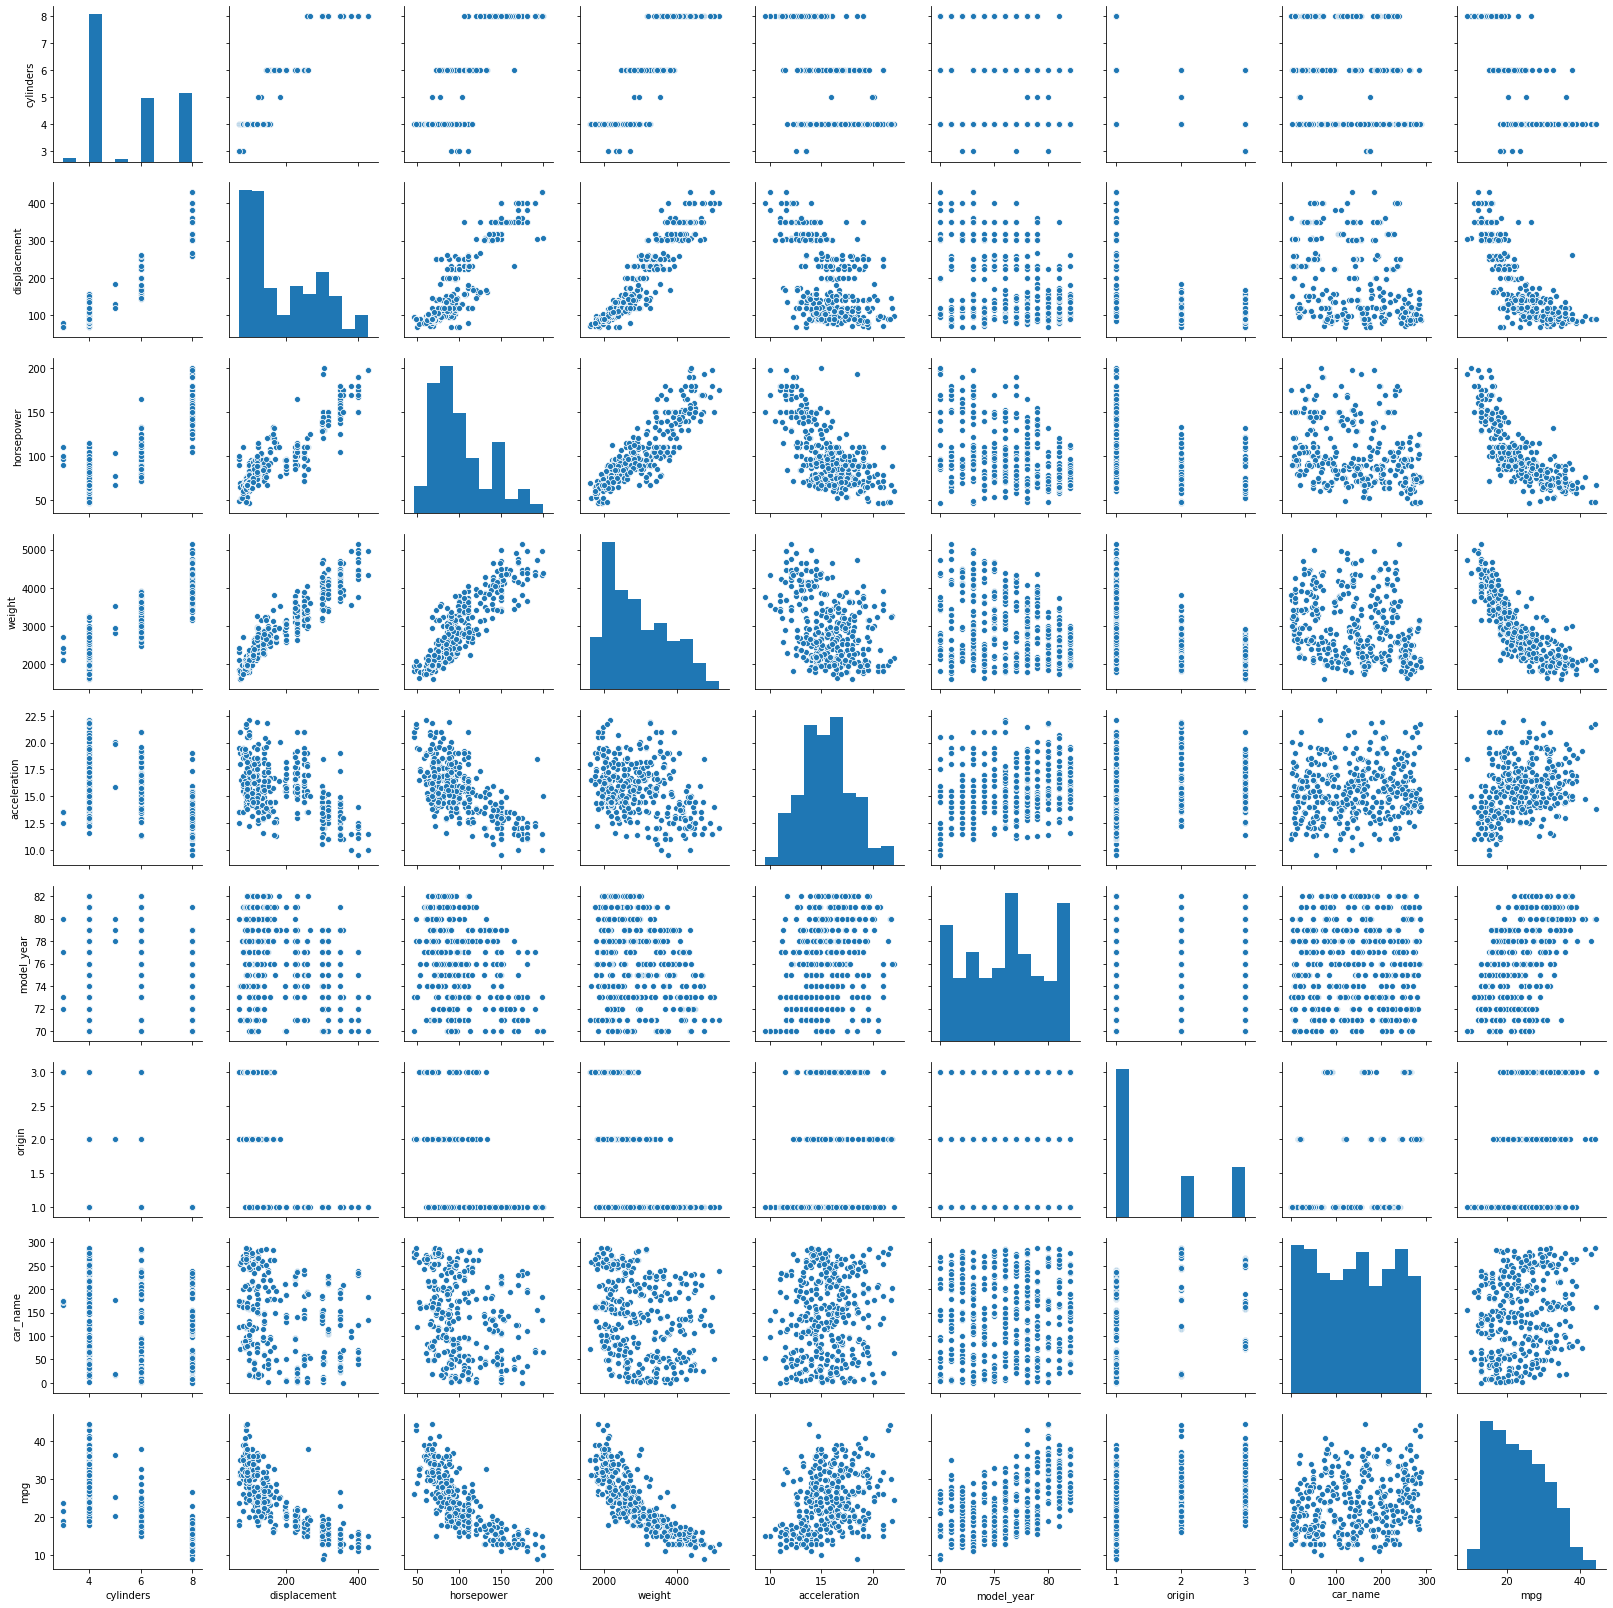

In [15]:
#Another way to experiment with type of model to use we can use pairplot to visualize correlation
sns.pairplot(ds)

### Almost 8 out of 9 features seem to have a linear correlation with variable mpg

In [16]:
#seperate x (independent variables) from y(dependent variable) to enter model
x = ds.iloc[:, 0:7].values
y = ds.iloc[:, 8].values

In [17]:
x

array([[  8. , 307. , 130. , ...,  12. ,  70. ,   1. ],
       [  8. , 350. , 165. , ...,  11.5,  70. ,   1. ],
       [  8. , 318. , 150. , ...,  11. ,  70. ,   1. ],
       ...,
       [  4. , 135. ,  84. , ...,  11.6,  82. ,   1. ],
       [  4. , 120. ,  79. , ...,  18.6,  82. ,   1. ],
       [  4. , 119. ,  82. , ...,  19.4,  82. ,   1. ]])

In [18]:
y

array([18. , 15. , 18. , 16. , 17. , 15. , 15. , 15. , 24. , 22. , 18. ,
       21. , 27. , 26. , 25. , 24. , 25. , 26. , 21. , 10. ,  9. , 27. ,
       28. , 25. , 19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. ,
       12. , 13. , 13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. ,
       31. , 35. , 27. , 26. , 24. , 25. , 20. , 21. , 13. , 14. , 15. ,
       14. , 17. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 18. , 16. , 18. , 18. ,
       23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. , 18. ,
       19. , 21. , 26. , 15. , 29. , 24. , 20. , 19. , 15. , 24. , 20. ,
       11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. , 16. , 18. ,
       16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. , 32. , 28. ,
       24. , 26. , 24. , 26. , 31. , 19. , 18. , 15. , 15. , 16. , 15. ,
       16. , 14. , 17. , 16. , 15. , 18. , 21. , 20

In [29]:
#splitting the data for model training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
# now since data ranges varies widely we need to unify the dataset to have a stronger model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [31]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Predicting the Test set results
y_pred = lr.predict(x_test)

In [33]:
 #Validation
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 9.52148718920309
MAE: 2.4401635710057796
RMSE: 3.085690715091694
r2_score: 0.8387062637374963


### Our model score is 83% which is good